<a href="https://colab.research.google.com/github/Patricia7sp/prova-4intelligence/blob/main/Processo_seletivo_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###    <font color=blue> PROVA DE CIÊNCIA DE DADOS

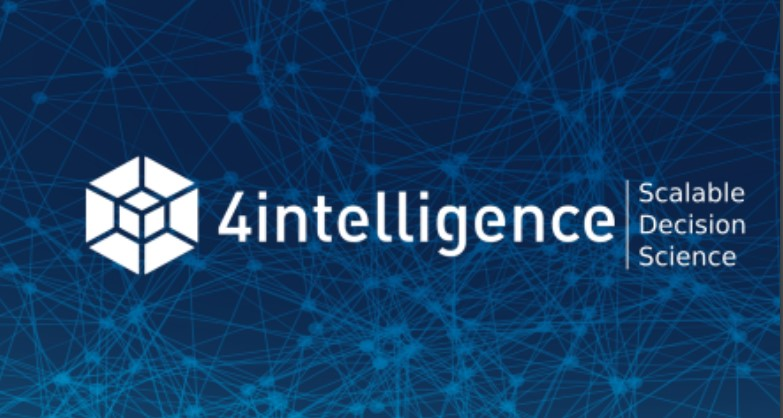

### <font color= red> Questão de número 2

###### <font color=green> Importando as bibliotecas necessárias 

In [ ]:
#Básicas
import pandas as pd
import numpy as np

#Gráficos
import seaborn as sns
import matplotlib.pyplot as plt



 ##### <font color=black> 1° Qual a composição das exportações brasileiras nos últimos 5 anos?

In [ ]:
#Abrindo o arquivo csv e lendo as 10 primeiras linhas

comex = pd.read_csv('data_comexstat.csv', sep=',', encoding='latin-1' )
comex.head(10)

In [ ]:
# Lendo as últimas 5 linhas 
comex.tail()

In [ ]:
# Separadando a coluna date em mês, ano e dia
comex['date'] = pd.to_datetime(comex.date, format='%Y-%m-%d')
comex['Year'] = comex['date'].dt.strftime('%Y')
comex['Mounth'] = comex['date'].dt.strftime('%m')
comex['Day'] = comex['date'].dt.strftime('%d')

In [ ]:
comex.head()

In [ ]:
# Excluindo a coluna date, pois já não é mais necessária

comex_v1 = comex.drop(columns=['date'])
comex_v1.head()

In [ ]:
# Reordenando as colunas

comex_v1 = comex_v1[['Year', 'Mounth', 'Day', 'product', 'state', 'country', 'type', 'route', 'usd']]
comex_v1.head()

In [ ]:
# Salvando os últimos 5 anos  de exportação em uma nova base

comex_year = comex_v1.query('Year>="2014" & type=="Export" ')
comex_year.head()




In [ ]:
#resetando o index
comex_year.reset_index(inplace=True)

In [ ]:
comex_year.head()

In [ ]:
comex_year['usd'].sum()

In [ ]:
# Avaliando a evolução das exportações nos últimos 5 anos
plt.plot(comex_year.Year)
plt.show()

In [ ]:
# Quantidade de exportação por Estado
comex_year.state.value_counts()

In [ ]:
# Produtos que são exportados e quantidade de exportações
comex_year['product'].value_counts()

#### <font color=black> 2° Qual a dinâmica da exportações anuais e mensais do Brasil de soja e milho?



###### <font color=green> Criando uma nova variável para receber somente os produto milho

In [ ]:

comex_corn = comex_v1.query('product=="corn" & type=="Export" ')
comex_corn.head()

In [ ]:
comex_corn[['Year', 'route']].value_counts()

In [ ]:
comex_corn[['Year', 'state', 'route', 'type', 'Mounth' ]].groupby(['route','state', 'Year', 'Mounth']).count()

In [ ]:
comex_corn[['route', 'Year', 'Mounth', 'state']].value_counts()

###### <font color=green> Criando uma nova variável para receber somente o produto soja

In [ ]:

comex_soybeans = comex_v1.query('product=="soybeans" & type=="Export" ') 
comex_soybeans.head()

In [ ]:
comex_soybeans[['Year', 'route']].value_counts()

In [ ]:
comex_soybeans[['route', 'Year', 'Mounth', 'state']].value_counts()